In [2]:
import pandas as pd

In [3]:
dataset1 = '../data/AirVisual Data Dump.csv'
dataset2 = '../data/airportdata.csv'

In [4]:
#loading data
data = pd.read_csv(dataset1)


In [60]:
#loading data
data1 = pd.read_csv(dataset2)
#peeking int o the data
#display(data1.isna().sum())
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84925 entries, 0 to 84924
Data columns (total 11 columns):
station               84925 non-null object
valid                 84925 non-null object
lon                   84925 non-null float64
lat                   84925 non-null float64
tmpc                  84557 non-null float64
relh                  84101 non-null float64
drct                  84736 non-null float64
sped                  84823 non-null float64
vsby                  84835 non-null float64
gust_mph              26 non-null float64
peak_wind_gust_mph    0 non-null float64
dtypes: float64(9), object(2)
memory usage: 7.1+ MB


In [61]:
#peeking into the data
data.head()

,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,weekdayName,hour,month
0,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 13:00:00,28.0,84,411.0,31.0,59.0,NaN,NaN,1,Tuesday,13,11
1,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 12:00:00,36.0,102,413.0,30.0,62.0,NaN,NaN,1,Tuesday,12,11
2,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 11:00:00,46.0,127,416.0,30.0,63.0,NaN,NaN,1,Tuesday,11,11
3,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 10:00:00,46.0,127,419.0,29.0,58.0,NaN,NaN,1,Tuesday,10,11
4,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 09:00:00,88.0,168,432.0,27.0,70.0,NaN,NaN,1,Tuesday,9,11


In [6]:
#columns
list(data.columns)

['SerialNumber',
 'City',
 'Name',
 'longitude',
 'latitude',
 'FirstOnline',
 'Datetime',
 'PM2.5',
 'USAQI',
 'CO2',
 'Temperature',
 'RelativeHumidity',
 'Outdoor PM2.5',
 'OutdoorUSAQI']

In [7]:
#shape of data
data.shape

(179749, 14)

In [8]:
#null values by column
data.isna().sum()

SerialNumber        14961
City                62132
Name                    0
longitude           62132
latitude            62132
FirstOnline         62132
Datetime                0
PM2.5                   0
USAQI                   0
CO2                 14961
Temperature          1499
RelativeHumidity     1499
Outdoor PM2.5       58910
OutdoorUSAQI        58910
dtype: int64

In [9]:
#null values in Datetime: 0
data["Datetime"].isna().sum()

0

In [10]:
#What is SerialNumber? It is repeated. 
data.SerialNumber.head()

0    4ypxth4
1    4ypxth4
2    4ypxth4
3    4ypxth4
4    4ypxth4
Name: SerialNumber, dtype: object

In [11]:
#null values in City:
data["City"].isna().sum()

62132

In [12]:
#filling null values in city with Karachi
data["City"].fillna("Karachi", inplace = True)

In [13]:
#null values by column again to verify that City has no null values
data.isna().sum()

SerialNumber        14961
City                    0
Name                    0
longitude           62132
latitude            62132
FirstOnline         62132
Datetime                0
PM2.5                   0
USAQI                   0
CO2                 14961
Temperature          1499
RelativeHumidity     1499
Outdoor PM2.5       58910
OutdoorUSAQI        58910
dtype: int64

## Key takeaways from Null Values:
1. Lat, Lon, and FirstOnLine has the same number of null values as City.
2. How to deal with 1? We treated City by replacing the nulls with Karachi but we can't do the same with the other three columns.
3. How to deal with null values of the other columns, we could try replacing it with the mean perhaps? 
4. Both Outdoor PM2.5 and OutdootUSAQI have a considerable number of null values (around 60k), we will have to think of a good way to deal with these.
5. What is Serial Number, it also has null values. (many repeated values as well)


## Exploring Serial Number

In [14]:
#let's look at unique Sno values and their count
data.SerialNumber.unique()

array(['4ypxth4', 'aj9xpaw', 'crp4y7m', 'kuh6xuc', 'kxvyx76', 'rjpamt6',
       'u7cwkla', '4cvxlkt', '997gv7h', 'a67pmak', 'ajgclt7', 'awawxwx',
       'cpguxuc', 'g6gs9ls', 'lllm4gm', 'lwpu64p', 'm9cuxv7', 'sarpstt',
       'tj4gawm', 'tlxa6x7', 'twa67s6', 'yggpgpl', nan], dtype=object)

In [15]:
#unique Serial Numbers
uniqueSNo = data.SerialNumber.unique()
len(uniqueSNo)

23

In [16]:
#Looking at what each SerialNumber corresponds to:
for i in uniqueSNo:
    display(data.loc[data.SerialNumber == i].head(1))
    

,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
0,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 13:00:00,28.0,84,411.0,31.0,59.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
24178,aj9xpaw,Karachi,Korangi,67.099761,24.834781,2016-10-26 13:00:00,2017-11-03 13:00:00,28.0,84,595.0,24.0,48.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
34647,crp4y7m,Peshawar,Peshawar Node,71.453667,33.978697,2017-01-29 18:00:00,2017-10-26 00:00:00,48.0,132,485.0,27.0,35.0,31.9,92.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
50484,kuh6xuc,Lahore,Lahore Cantt,74.375955,31.510631,2017-10-31 14:00:00,2017-11-07 13:00:00,446.0,464,509.0,22.0,83.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
59482,kxvyx76,Lahore,Lahore (Upper Mall),74.36144,31.5476,2017-11-01 23:00:00,2017-11-07 13:00:00,55.0,149,896.0,24.0,77.0,151.0,201.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
67636,rjpamt6,Karachi,karachi - industrial,NaN,NaN,NaN,2017-07-09 08:00:00,30.0,88,409.0,29.0,86.0,23.8,76.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
86480,u7cwkla,Islamabad,Sector E11,72.971079,33.697612,2017-02-23 20:00:00,2017-11-07 13:00:00,153.0,203,428.0,21.0,58.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
103214,4cvxlkt,Karachi,aishamanzil,NaN,NaN,NaN,2018-09-19 06:00:00,24.0,76,431.0,27.0,80.0,15.8,59.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
106777,997gv7h,Karachi,northkarachi,NaN,NaN,NaN,2018-09-14 14:00:00,62.0,154,631.0,29.0,74.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
108875,a67pmak,Karachi,landhi,NaN,NaN,NaN,2018-09-29 10:00:00,1799.0,1357,414.0,28.0,80.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
113455,ajgclt7,Karachi,Korangi (J-Area),67.162531,24.834358,2018-08-17 16:00:00,2018-09-15 23:00:00,24.0,76,432.0,28.0,80.0,14.0,55.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
117581,awawxwx,Lahore,"Fida Hussain House, Bedian Road",74.4713,31.4364,2018-06-03 20:00:00,2018-10-12 19:00:00,124.0,186,471.0,23.0,74.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
119595,cpguxuc,Karachi,saddar,NaN,NaN,NaN,2018-10-12 19:00:00,100.0,174,430.0,29.0,42.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
125262,g6gs9ls,Karachi,Hyderi Market,67.04409,24.937533,2018-08-30 09:00:00,2018-09-04 23:00:00,27.0,82,411.0,27.0,78.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
129353,lllm4gm,Karachi,bahadurabad,NaN,NaN,NaN,2018-10-12 19:00:00,83.0,165,423.0,30.0,40.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
135646,lwpu64p,Karachi,orangi town,NaN,NaN,NaN,2018-07-19 21:00:00,1799.0,1357,410.0,28.0,85.0,8.1,33.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
139481,m9cuxv7,Karachi,d.h.a phase 5,NaN,NaN,NaN,2018-10-12 19:00:00,86.0,167,514.0,29.0,53.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
142670,sarpstt,Bahawalpur,Al Farooq School,71.65525,29.390871,2018-05-10 12:00:00,2018-09-22 20:00:00,30.0,88,409.0,30.0,60.0,36.1,102.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
146348,tj4gawm,Karachi,shershah,NaN,NaN,NaN,2018-10-12 14:00:00,55.0,149,424.0,36.0,34.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
148670,tlxa6x7,Karachi,Liaquatabad,NaN,NaN,NaN,2018-10-12 19:00:00,95.0,171,437.0,32.0,36.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
153987,twa67s6,Karachi,mt khan road,NaN,NaN,NaN,2018-10-12 19:00:00,86.0,167,492.0,30.0,47.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
160411,yggpgpl,Karachi,"Civic Center, Korangi",67.162402,24.834368,2018-08-30 09:00:00,2018-10-12 19:00:00,98.0,173,429.0,30.0,39.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI


In [17]:
#null values
data.SerialNumber.isna().sum()

14961

### Key takeaways from Serial Number:
1. each unique serial number corresponds to a different location (i.e. Name) 
2. There are 23 unique values which means 22 locations (22 actually, 23rd is Nan)

In [18]:
#null values in Name i.e. location
data.Name.isna().sum()

0

In [19]:
display(len(data.Name.unique()))
display(len(data.SerialNumber.unique()))

28

23

In [20]:
data1 = data.SerialNumber.isna()
nullNames = data[data1].Name.unique()

In [21]:
uniqueSNo = data.SerialNumber.unique()
names = []
for i in uniqueSNo[:-1]:
    names.append(list(data.loc[data.SerialNumber == i].head(1).values)[0][2])
display(names)
#the locations corresponding to null values of serial number don't have non-null values in the entire dataset.

['Defence Housing Authority',
 'Korangi',
 'Peshawar Node',
 'Lahore Cantt',
 'Lahore (Upper Mall)',
 'karachi - industrial',
 'Sector E11',
 'aishamanzil',
 'northkarachi',
 'landhi',
 'Korangi (J-Area)',
 'Fida Hussain House, Bedian Road',
 'saddar',
 'Hyderi Market',
 'bahadurabad',
 'orangi town',
 'd.h.a phase 5',
 'Al Farooq School',
 'shershah',
 'Liaquatabad',
 'mt khan road',
 'Civic Center, Korangi']

In [22]:
uniqueSNo = data.SerialNumber.unique()
SNoToName = {}
for i in uniqueSNo[:-1]:
    SNoToName[list(data.loc[data.SerialNumber == i].head(1).values)[0][2]] = i
display(SNoToName)

{'Defence Housing Authority': '4ypxth4',
 'Korangi': 'aj9xpaw',
 'Peshawar Node': 'crp4y7m',
 'Lahore Cantt': 'kuh6xuc',
 'Lahore (Upper Mall)': 'kxvyx76',
 'karachi - industrial': 'rjpamt6',
 'Sector E11': 'u7cwkla',
 'aishamanzil': '4cvxlkt',
 'northkarachi': '997gv7h',
 'landhi': 'a67pmak',
 'Korangi (J-Area)': 'ajgclt7',
 'Fida Hussain House, Bedian Road': 'awawxwx',
 'saddar': 'cpguxuc',
 'Hyderi Market': 'g6gs9ls',
 'bahadurabad': 'lllm4gm',
 'orangi town': 'lwpu64p',
 'd.h.a phase 5': 'm9cuxv7',
 'Al Farooq School': 'sarpstt',
 'shershah': 'tj4gawm',
 'Liaquatabad': 'tlxa6x7',
 'mt khan road': 'twa67s6',
 'Civic Center, Korangi': 'yggpgpl'}

In [23]:
#dealing with null values in Serial Number
#data.SerialNumber.fillna(SNoToName[list(data.loc[data.SerialNumber == i].head(1).values)[0][2]], inplace = True)
data.isna().sum()
uniqueName = data.Name.unique()
for i in uniqueName:
    display(data.loc[data.Name == i].head())
 

,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
0,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 13:00:00,28.0,84,411.0,31.0,59.0,NaN,NaN
1,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 12:00:00,36.0,102,413.0,30.0,62.0,NaN,NaN
2,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 11:00:00,46.0,127,416.0,30.0,63.0,NaN,NaN
3,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 10:00:00,46.0,127,419.0,29.0,58.0,NaN,NaN
4,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 09:00:00,88.0,168,432.0,27.0,70.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
24178,aj9xpaw,Karachi,Korangi,67.099761,24.834781,2016-10-26 13:00:00,2017-11-03 13:00:00,28.0,84,595.0,24.0,48.0,NaN,NaN
24179,aj9xpaw,Karachi,Korangi,67.099761,24.834781,2016-10-26 13:00:00,2017-11-03 12:00:00,31.0,91,603.0,25.0,51.0,NaN,NaN
24180,aj9xpaw,Karachi,Korangi,67.099761,24.834781,2016-10-26 13:00:00,2017-09-15 17:00:00,35.0,99,660.0,28.0,50.0,NaN,NaN
24181,aj9xpaw,Karachi,Korangi,67.099761,24.834781,2016-10-26 13:00:00,2017-09-15 16:00:00,37.0,105,701.0,28.0,51.0,NaN,NaN
24182,aj9xpaw,Karachi,Korangi,67.099761,24.834781,2016-10-26 13:00:00,2017-09-15 15:00:00,20.0,68,628.0,28.0,51.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
34647,crp4y7m,Peshawar,Peshawar Node,71.453667,33.978697,2017-01-29 18:00:00,2017-10-26 00:00:00,48.0,132,485.0,27.0,35.0,31.9,92.0
34648,crp4y7m,Peshawar,Peshawar Node,71.453667,33.978697,2017-01-29 18:00:00,2017-10-25 23:00:00,62.0,154,506.0,27.0,36.0,31.9,92.0
34649,crp4y7m,Peshawar,Peshawar Node,71.453667,33.978697,2017-01-29 18:00:00,2017-10-25 22:00:00,77.0,162,578.0,27.0,38.0,31.9,92.0
34650,crp4y7m,Peshawar,Peshawar Node,71.453667,33.978697,2017-01-29 18:00:00,2017-10-25 21:00:00,82.0,165,758.0,27.0,39.0,31.9,92.0
34651,crp4y7m,Peshawar,Peshawar Node,71.453667,33.978697,2017-01-29 18:00:00,2017-10-25 20:00:00,91.0,169,1004.0,27.0,41.0,31.9,92.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
50484,kuh6xuc,Lahore,Lahore Cantt,74.375955,31.510631,2017-10-31 14:00:00,2017-11-07 13:00:00,446.0,464,509.0,22.0,83.0,NaN,NaN
50485,kuh6xuc,Lahore,Lahore Cantt,74.375955,31.510631,2017-10-31 14:00:00,2017-11-07 12:00:00,374.0,417,501.0,21.0,84.0,NaN,NaN
50486,kuh6xuc,Lahore,Lahore Cantt,74.375955,31.510631,2017-10-31 14:00:00,2017-11-07 11:00:00,342.0,392,494.0,21.0,87.0,NaN,NaN
50487,kuh6xuc,Lahore,Lahore Cantt,74.375955,31.510631,2017-10-31 14:00:00,2017-11-07 10:00:00,438.0,459,496.0,20.0,89.0,NaN,NaN
50488,kuh6xuc,Lahore,Lahore Cantt,74.375955,31.510631,2017-10-31 14:00:00,2017-11-07 09:00:00,496.0,497,495.0,19.0,90.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
59482,kxvyx76,Lahore,Lahore (Upper Mall),74.36144,31.5476,2017-11-01 23:00:00,2017-11-07 13:00:00,55.0,149,896.0,24.0,77.0,151.0,201.0
59483,kxvyx76,Lahore,Lahore (Upper Mall),74.36144,31.5476,2017-11-01 23:00:00,2017-11-07 12:00:00,277.0,327,686.0,24.0,78.0,146.1,198.0
59484,kxvyx76,Lahore,Lahore (Upper Mall),74.36144,31.5476,2017-11-01 23:00:00,2017-11-07 10:00:00,270.0,320,1002.0,21.0,82.0,197.5,248.0
59485,kxvyx76,Lahore,Lahore (Upper Mall),74.36144,31.5476,2017-11-01 23:00:00,2017-11-07 09:00:00,482.0,488,521.0,21.0,80.0,235.9,286.0
59486,kxvyx76,Lahore,Lahore (Upper Mall),74.36144,31.5476,2017-11-01 23:00:00,2017-11-07 08:00:00,465.0,477,580.0,20.0,83.0,200.4,250.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
67636,rjpamt6,Karachi,karachi - industrial,NaN,NaN,NaN,2017-07-09 08:00:00,30.0,88,409.0,29.0,86.0,23.8,76.0
67637,rjpamt6,Karachi,karachi - industrial,NaN,NaN,NaN,2017-07-09 07:00:00,32.0,93,406.0,29.0,86.0,18.3,64.0
67638,rjpamt6,Karachi,karachi - industrial,NaN,NaN,NaN,2017-07-09 06:00:00,20.0,68,410.0,29.0,84.0,16.8,61.0
67639,rjpamt6,Karachi,karachi - industrial,NaN,NaN,NaN,2017-07-09 05:00:00,18.0,63,409.0,29.0,82.0,19.0,65.0
67640,rjpamt6,Karachi,karachi - industrial,NaN,NaN,NaN,2017-07-09 04:00:00,17.0,61,415.0,29.0,82.0,19.2,66.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
86480,u7cwkla,Islamabad,Sector E11,72.971079,33.697612,2017-02-23 20:00:00,2017-11-07 13:00:00,153.0,203,428.0,21.0,58.0,NaN,NaN
86481,u7cwkla,Islamabad,Sector E11,72.971079,33.697612,2017-02-23 20:00:00,2017-11-07 12:00:00,150.0,200,410.0,21.0,60.0,NaN,NaN
86482,u7cwkla,Islamabad,Sector E11,72.971079,33.697612,2017-02-23 20:00:00,2017-11-07 11:00:00,143.0,196,424.0,21.0,62.0,NaN,NaN
86483,u7cwkla,Islamabad,Sector E11,72.971079,33.697612,2017-02-23 20:00:00,2017-11-07 10:00:00,161.0,211,443.0,20.0,65.0,NaN,NaN
86484,u7cwkla,Islamabad,Sector E11,72.971079,33.697612,2017-02-23 20:00:00,2017-11-07 09:00:00,230.0,280,478.0,19.0,69.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
103214,4cvxlkt,Karachi,aishamanzil,NaN,NaN,NaN,2018-09-19 06:00:00,24.0,76,431.0,27.0,80.0,15.8,59.0
103215,4cvxlkt,Karachi,aishamanzil,NaN,NaN,NaN,2018-09-19 05:00:00,24.0,76,432.0,27.0,79.0,15.7,59.0
103216,4cvxlkt,Karachi,aishamanzil,NaN,NaN,NaN,2018-09-19 04:00:00,21.0,70,430.0,27.0,80.0,16.5,60.0
103217,4cvxlkt,Karachi,aishamanzil,NaN,NaN,NaN,2018-09-19 03:00:00,24.0,76,443.0,27.0,81.0,15.0,57.0
103218,4cvxlkt,Karachi,aishamanzil,NaN,NaN,NaN,2018-09-19 02:00:00,24.0,76,426.0,27.0,79.0,16.7,61.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
106777,997gv7h,Karachi,northkarachi,NaN,NaN,NaN,2018-09-14 14:00:00,62.0,154,631.0,29.0,74.0,NaN,NaN
106778,997gv7h,Karachi,northkarachi,NaN,NaN,NaN,2018-09-14 13:00:00,116.0,182,671.0,30.0,72.0,NaN,NaN
106779,997gv7h,Karachi,northkarachi,NaN,NaN,NaN,2018-07-31 11:00:00,169.0,219,616.0,36.0,53.0,17.6,63.0
106780,997gv7h,Karachi,northkarachi,NaN,NaN,NaN,2018-07-31 04:00:00,63.0,155,409.0,29.0,74.0,10.1,42.0
106781,997gv7h,Karachi,northkarachi,NaN,NaN,NaN,2018-07-30 03:00:00,44.0,122,405.0,28.0,77.0,5.6,23.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
108875,a67pmak,Karachi,landhi,NaN,NaN,NaN,2018-09-29 10:00:00,1799.0,1357,414.0,28.0,80.0,NaN,NaN
108876,a67pmak,Karachi,landhi,NaN,NaN,NaN,2018-09-29 09:00:00,1799.0,1357,412.0,28.0,82.0,NaN,NaN
108877,a67pmak,Karachi,landhi,NaN,NaN,NaN,2018-09-29 08:00:00,1799.0,1357,416.0,28.0,85.0,NaN,NaN
108878,a67pmak,Karachi,landhi,NaN,NaN,NaN,2018-09-29 07:00:00,1799.0,1357,431.0,27.0,88.0,NaN,NaN
108879,a67pmak,Karachi,landhi,NaN,NaN,NaN,2018-09-29 06:00:00,1799.0,1357,414.0,27.0,87.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
113455,ajgclt7,Karachi,Korangi (J-Area),67.162531,24.834358,2018-08-17 16:00:00,2018-09-15 23:00:00,24.0,76,432.0,28.0,80.0,14.0,55.0
113456,ajgclt7,Karachi,Korangi (J-Area),67.162531,24.834358,2018-08-17 16:00:00,2018-09-15 22:00:00,27.0,82,434.0,28.0,80.0,13.4,54.0
113457,ajgclt7,Karachi,Korangi (J-Area),67.162531,24.834358,2018-08-17 16:00:00,2018-09-15 21:00:00,28.0,84,436.0,28.0,79.0,13.1,53.0
113458,ajgclt7,Karachi,Korangi (J-Area),67.162531,24.834358,2018-08-17 16:00:00,2018-09-15 20:00:00,28.0,84,437.0,28.0,78.0,13.4,54.0
113459,ajgclt7,Karachi,Korangi (J-Area),67.162531,24.834358,2018-08-17 16:00:00,2018-09-15 19:00:00,29.0,86,437.0,29.0,77.0,13.3,54.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
117581,awawxwx,Lahore,"Fida Hussain House, Bedian Road",74.4713,31.4364,2018-06-03 20:00:00,2018-10-12 19:00:00,124.0,186,471.0,23.0,74.0,NaN,NaN
117582,awawxwx,Lahore,"Fida Hussain House, Bedian Road",74.4713,31.4364,2018-06-03 20:00:00,2018-10-12 18:00:00,113.0,181,460.0,24.0,71.0,NaN,NaN
117583,awawxwx,Lahore,"Fida Hussain House, Bedian Road",74.4713,31.4364,2018-06-03 20:00:00,2018-10-12 17:00:00,83.0,165,442.0,26.0,62.0,NaN,NaN
117584,awawxwx,Lahore,"Fida Hussain House, Bedian Road",74.4713,31.4364,2018-06-03 20:00:00,2018-10-12 16:00:00,75.0,161,427.0,28.0,53.0,NaN,NaN
117585,awawxwx,Lahore,"Fida Hussain House, Bedian Road",74.4713,31.4364,2018-06-03 20:00:00,2018-10-12 15:00:00,63.0,155,428.0,29.0,49.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
119595,cpguxuc,Karachi,saddar,NaN,NaN,NaN,2018-10-12 19:00:00,100.0,174,430.0,29.0,42.0,NaN,NaN
119596,cpguxuc,Karachi,saddar,NaN,NaN,NaN,2018-10-12 18:00:00,75.0,161,424.0,30.0,46.0,NaN,NaN
119597,cpguxuc,Karachi,saddar,NaN,NaN,NaN,2018-10-12 17:00:00,70.0,158,421.0,31.0,49.0,NaN,NaN
119598,cpguxuc,Karachi,saddar,NaN,NaN,NaN,2018-10-12 16:00:00,60.0,153,417.0,33.0,38.0,NaN,NaN
119599,cpguxuc,Karachi,saddar,NaN,NaN,NaN,2018-10-12 15:00:00,70.0,158,418.0,33.0,36.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
125262,g6gs9ls,Karachi,Hyderi Market,67.04409,24.937533,2018-08-30 09:00:00,2018-09-04 23:00:00,27.0,82,411.0,27.0,78.0,NaN,NaN
125263,g6gs9ls,Karachi,Hyderi Market,67.04409,24.937533,2018-08-30 09:00:00,2018-09-04 22:00:00,30.0,88,415.0,27.0,78.0,NaN,NaN
125264,g6gs9ls,Karachi,Hyderi Market,67.04409,24.937533,2018-08-30 09:00:00,2018-09-04 21:00:00,33.0,95,420.0,27.0,77.0,NaN,NaN
125265,g6gs9ls,Karachi,Hyderi Market,67.04409,24.937533,2018-08-30 09:00:00,2018-09-04 20:00:00,32.0,93,421.0,27.0,76.0,NaN,NaN
125266,g6gs9ls,Karachi,Hyderi Market,67.04409,24.937533,2018-08-30 09:00:00,2018-09-04 19:00:00,33.0,95,421.0,28.0,75.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
129353,lllm4gm,Karachi,bahadurabad,NaN,NaN,NaN,2018-10-12 19:00:00,83.0,165,423.0,30.0,40.0,NaN,NaN
129354,lllm4gm,Karachi,bahadurabad,NaN,NaN,NaN,2018-10-12 18:00:00,67.0,157,418.0,31.0,43.0,NaN,NaN
129355,lllm4gm,Karachi,bahadurabad,NaN,NaN,NaN,2018-10-12 17:00:00,63.0,155,412.0,32.0,42.0,NaN,NaN
129356,lllm4gm,Karachi,bahadurabad,NaN,NaN,NaN,2018-10-12 16:00:00,54.0,146,409.0,33.0,34.0,NaN,NaN
129357,lllm4gm,Karachi,bahadurabad,NaN,NaN,NaN,2018-10-12 15:00:00,58.0,152,415.0,36.0,30.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
135646,lwpu64p,Karachi,orangi town,NaN,NaN,NaN,2018-07-19 21:00:00,1799.0,1357,410.0,28.0,85.0,8.1,33.0
135647,lwpu64p,Karachi,orangi town,NaN,NaN,NaN,2018-07-19 20:00:00,1799.0,1357,411.0,28.0,83.0,8.6,36.0
135648,lwpu64p,Karachi,orangi town,NaN,NaN,NaN,2018-07-19 19:00:00,1799.0,1357,414.0,29.0,81.0,8.5,35.0
135649,lwpu64p,Karachi,orangi town,NaN,NaN,NaN,2018-07-19 18:00:00,1799.0,1357,417.0,30.0,78.0,8.4,35.0
135650,lwpu64p,Karachi,orangi town,NaN,NaN,NaN,2018-07-19 17:00:00,1799.0,1357,418.0,31.0,75.0,8.7,36.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
139481,m9cuxv7,Karachi,d.h.a phase 5,NaN,NaN,NaN,2018-10-12 19:00:00,86.0,167,514.0,29.0,53.0,NaN,NaN
139482,m9cuxv7,Karachi,d.h.a phase 5,NaN,NaN,NaN,2018-10-12 18:00:00,90.0,169,479.0,29.0,52.0,NaN,NaN
139483,m9cuxv7,Karachi,d.h.a phase 5,NaN,NaN,NaN,2018-10-12 09:00:00,73.0,160,491.0,28.0,55.0,NaN,NaN
139484,m9cuxv7,Karachi,d.h.a phase 5,NaN,NaN,NaN,2018-10-12 08:00:00,89.0,168,498.0,28.0,55.0,NaN,NaN
139485,m9cuxv7,Karachi,d.h.a phase 5,NaN,NaN,NaN,2018-10-12 07:00:00,90.0,169,490.0,28.0,55.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
142670,sarpstt,Bahawalpur,Al Farooq School,71.65525,29.390871,2018-05-10 12:00:00,2018-09-22 20:00:00,30.0,88,409.0,30.0,60.0,36.1,102.0
142671,sarpstt,Bahawalpur,Al Farooq School,71.65525,29.390871,2018-05-10 12:00:00,2018-09-22 19:00:00,35.0,99,410.0,30.0,60.0,30.0,88.0
142672,sarpstt,Bahawalpur,Al Farooq School,71.65525,29.390871,2018-05-10 12:00:00,2018-09-22 18:00:00,34.0,97,408.0,31.0,63.0,37.1,105.0
142673,sarpstt,Bahawalpur,Al Farooq School,71.65525,29.390871,2018-05-10 12:00:00,2018-09-22 17:00:00,22.0,72,406.0,31.0,62.0,38.4,108.0
142674,sarpstt,Bahawalpur,Al Farooq School,71.65525,29.390871,2018-05-10 12:00:00,2018-09-22 16:00:00,18.0,63,400.0,31.0,61.0,42.2,117.0


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
146348,tj4gawm,Karachi,shershah,NaN,NaN,NaN,2018-10-12 14:00:00,55.0,149,424.0,36.0,34.0,NaN,NaN
146349,tj4gawm,Karachi,shershah,NaN,NaN,NaN,2018-10-12 13:00:00,52.0,141,423.0,37.0,24.0,NaN,NaN
146350,tj4gawm,Karachi,shershah,NaN,NaN,NaN,2018-10-12 11:00:00,67.0,157,420.0,35.0,24.0,NaN,NaN
146351,tj4gawm,Karachi,shershah,NaN,NaN,NaN,2018-10-12 10:00:00,70.0,158,420.0,34.0,30.0,NaN,NaN
146352,tj4gawm,Karachi,shershah,NaN,NaN,NaN,2018-10-12 09:00:00,70.0,158,419.0,32.0,32.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
148670,tlxa6x7,Karachi,Liaquatabad,NaN,NaN,NaN,2018-10-12 19:00:00,95.0,171,437.0,32.0,36.0,NaN,NaN
148671,tlxa6x7,Karachi,Liaquatabad,NaN,NaN,NaN,2018-10-12 18:00:00,89.0,168,430.0,32.0,36.0,NaN,NaN
148672,tlxa6x7,Karachi,Liaquatabad,NaN,NaN,NaN,2018-10-12 17:00:00,66.0,156,421.0,34.0,38.0,NaN,NaN
148673,tlxa6x7,Karachi,Liaquatabad,NaN,NaN,NaN,2018-10-12 16:00:00,73.0,160,427.0,38.0,28.0,NaN,NaN
148674,tlxa6x7,Karachi,Liaquatabad,NaN,NaN,NaN,2018-10-12 15:00:00,84.0,166,436.0,39.0,27.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
153987,twa67s6,Karachi,mt khan road,NaN,NaN,NaN,2018-10-12 19:00:00,86.0,167,492.0,30.0,47.0,NaN,NaN
153988,twa67s6,Karachi,mt khan road,NaN,NaN,NaN,2018-10-12 18:00:00,69.0,158,525.0,30.0,53.0,NaN,NaN
153989,twa67s6,Karachi,mt khan road,NaN,NaN,NaN,2018-10-12 17:00:00,69.0,158,478.0,31.0,56.0,NaN,NaN
153990,twa67s6,Karachi,mt khan road,NaN,NaN,NaN,2018-10-12 16:00:00,61.0,154,469.0,33.0,46.0,NaN,NaN
153991,twa67s6,Karachi,mt khan road,NaN,NaN,NaN,2018-10-12 15:00:00,54.0,146,471.0,33.0,43.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
160411,yggpgpl,Karachi,"Civic Center, Korangi",67.162402,24.834368,2018-08-30 09:00:00,2018-10-12 19:00:00,98.0,173,429.0,30.0,39.0,NaN,NaN
160412,yggpgpl,Karachi,"Civic Center, Korangi",67.162402,24.834368,2018-08-30 09:00:00,2018-10-12 18:00:00,82.0,165,424.0,30.0,39.0,NaN,NaN
160413,yggpgpl,Karachi,"Civic Center, Korangi",67.162402,24.834368,2018-08-30 09:00:00,2018-10-12 17:00:00,70.0,158,417.0,32.0,39.0,NaN,NaN
160414,yggpgpl,Karachi,"Civic Center, Korangi",67.162402,24.834368,2018-08-30 09:00:00,2018-10-12 16:00:00,61.0,154,415.0,36.0,29.0,NaN,NaN
160415,yggpgpl,Karachi,"Civic Center, Korangi",67.162402,24.834368,2018-08-30 09:00:00,2018-10-12 15:00:00,42.0,117,416.0,38.0,17.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
164788,NaN,Lahore,1FCC Gulberg Syed Maratib Ali Road,74.337812,31.529309,2018-01-11 13:00:00,2018-07-03 07:00:00,40.50,113,NaN,25.0,88.0,NaN,NaN
164789,NaN,Lahore,1FCC Gulberg Syed Maratib Ali Road,74.337812,31.529309,2018-01-11 13:00:00,2018-07-03 06:00:00,47.84,131,NaN,24.0,94.0,NaN,NaN
164790,NaN,Lahore,1FCC Gulberg Syed Maratib Ali Road,74.337812,31.529309,2018-01-11 13:00:00,2018-07-03 05:00:00,34.25,97,NaN,24.0,94.0,NaN,NaN
164791,NaN,Lahore,1FCC Gulberg Syed Maratib Ali Road,74.337812,31.529309,2018-01-11 13:00:00,2018-07-03 04:00:00,44.16,122,NaN,23.0,94.0,NaN,NaN
164792,NaN,Lahore,1FCC Gulberg Syed Maratib Ali Road,74.337812,31.529309,2018-01-11 13:00:00,2018-07-03 03:00:00,41.11,115,NaN,23.0,100.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
165954,NaN,Lahore,Abu Bakar Block,74.323003,31.511676,2018-09-01 08:00:00,2018-10-18 14:00:00,83.66,166,NaN,30.0,42.0,NaN,NaN
165955,NaN,Lahore,Abu Bakar Block,74.323003,31.511676,2018-09-01 08:00:00,2018-10-18 13:00:00,97.19,173,NaN,29.0,45.0,NaN,NaN
165956,NaN,Lahore,Abu Bakar Block,74.323003,31.511676,2018-09-01 08:00:00,2018-10-18 12:00:00,131.80,190,NaN,28.0,48.0,NaN,NaN
165957,NaN,Lahore,Abu Bakar Block,74.323003,31.511676,2018-09-01 08:00:00,2018-10-18 11:00:00,258.88,309,NaN,27.0,51.0,NaN,NaN
165958,NaN,Lahore,Abu Bakar Block,74.323003,31.511676,2018-09-01 08:00:00,2018-10-18 10:00:00,300.80,351,NaN,23.0,61.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
167045,NaN,Rawalpindi,Bahria Town Phase 2,73.121466,33.55402,2018-08-28 07:00:00,2018-10-18 14:00:00,45.32,125,NaN,28.0,37.0,NaN,NaN
167046,NaN,Rawalpindi,Bahria Town Phase 2,73.121466,33.55402,2018-08-28 07:00:00,2018-10-18 13:00:00,51.93,141,NaN,27.0,36.0,NaN,NaN
167047,NaN,Rawalpindi,Bahria Town Phase 2,73.121466,33.55402,2018-08-28 07:00:00,2018-10-18 12:00:00,49.82,136,NaN,27.0,36.0,NaN,NaN
167048,NaN,Rawalpindi,Bahria Town Phase 2,73.121466,33.55402,2018-08-28 07:00:00,2018-10-18 11:00:00,63.98,155,NaN,24.0,47.0,NaN,NaN
167049,NaN,Rawalpindi,Bahria Town Phase 2,73.121466,33.55402,2018-08-28 07:00:00,2018-10-18 10:00:00,84.05,166,NaN,22.0,53.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
168165,NaN,Islamabad,Kachnar Park,73.076654,33.675511,2018-04-16 09:00:00,2018-10-18 12:00:00,49.52,135,NaN,27.0,36.0,NaN,NaN
168166,NaN,Islamabad,Kachnar Park,73.076654,33.675511,2018-04-16 09:00:00,2018-10-18 11:00:00,46.09,127,NaN,24.0,47.0,NaN,NaN
168167,NaN,Islamabad,Kachnar Park,73.076654,33.675511,2018-04-16 09:00:00,2018-10-18 10:00:00,36.69,104,NaN,22.0,53.0,NaN,NaN
168168,NaN,Islamabad,Kachnar Park,73.076654,33.675511,2018-04-16 09:00:00,2018-10-18 09:00:00,28.77,86,NaN,19.0,63.0,NaN,NaN
168169,NaN,Islamabad,Kachnar Park,73.076654,33.675511,2018-04-16 09:00:00,2018-10-18 08:00:00,28.82,86,NaN,17.0,67.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
171605,NaN,Lahore,NETSOL - Ghazi Road Interchange,74.421947,31.497171,2018-01-11 13:00:00,2018-10-18 14:00:00,90.90,169,NaN,30.0,42.0,NaN,NaN
171606,NaN,Lahore,NETSOL - Ghazi Road Interchange,74.421947,31.497171,2018-01-11 13:00:00,2018-10-18 13:00:00,121.31,185,NaN,29.0,45.0,NaN,NaN
171607,NaN,Lahore,NETSOL - Ghazi Road Interchange,74.421947,31.497171,2018-01-11 13:00:00,2018-10-18 12:00:00,222.29,272,NaN,28.0,48.0,NaN,NaN
171608,NaN,Lahore,NETSOL - Ghazi Road Interchange,74.421947,31.497171,2018-01-11 13:00:00,2018-10-18 11:00:00,202.93,253,NaN,27.0,51.0,NaN,NaN
171609,NaN,Lahore,NETSOL - Ghazi Road Interchange,74.421947,31.497171,2018-01-11 13:00:00,2018-10-18 10:00:00,293.14,343,NaN,23.0,61.0,NaN,NaN


,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
175887,NaN,Faisalabad,Batala Colony,73.101371,31.400796,2018-01-04 08:00:00,2018-10-18 14:00:00,71.14,159,NaN,32.0,41.0,NaN,NaN
175888,NaN,Faisalabad,Batala Colony,73.101371,31.400796,2018-01-04 08:00:00,2018-10-18 13:00:00,95.27,172,NaN,29.0,46.0,NaN,NaN
175889,NaN,Faisalabad,Batala Colony,73.101371,31.400796,2018-01-04 08:00:00,2018-10-18 12:00:00,113.60,181,NaN,26.0,56.0,NaN,NaN
175890,NaN,Faisalabad,Batala Colony,73.101371,31.400796,2018-01-04 08:00:00,2018-10-18 11:00:00,127.63,188,NaN,26.0,56.0,NaN,NaN
175891,NaN,Faisalabad,Batala Colony,73.101371,31.400796,2018-01-04 08:00:00,2018-10-18 10:00:00,130.31,190,NaN,26.0,56.0,NaN,NaN


# Datatypes

In [24]:
display(sorted(data["Datetime"])[:10])

['2016-10-06 14:00:00',
 '2016-10-06 14:00:00',
 '2016-10-06 15:00:00',
 '2016-10-06 15:00:00',
 '2016-10-06 17:00:00',
 '2016-10-06 17:00:00',
 '2016-10-06 18:00:00',
 '2016-10-06 18:00:00',
 '2016-10-06 19:00:00',
 '2016-10-06 19:00:00']

In [25]:
data.dtypes

SerialNumber         object
City                 object
Name                 object
longitude           float64
latitude            float64
FirstOnline          object
Datetime             object
PM2.5               float64
USAQI                 int64
CO2                 float64
Temperature         float64
RelativeHumidity    float64
Outdoor PM2.5       float64
OutdoorUSAQI        float64
dtype: object

## Key takeaways from datatypes:
1. FirstOnLine, datetime should be consistent, not object. possible reasons for this could be that there are null values in FirstOnline and datetime is a composite attribute.
2. City and Name should be str
3. Serial Number should be str.

In [26]:
data.corr('spearman') 

,longitude,latitude,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
longitude,1.000000,0.590104,0.371363,0.371418,0.504597,-0.195061,-0.126170,0.095805,0.095686
latitude,0.590104,1.000000,0.167328,0.167333,0.448461,-0.133132,-0.367784,0.104327,0.103743
PM2.5,0.371363,0.167328,1.000000,0.999985,0.333786,-0.221569,-0.146587,0.315294,0.315299
USAQI,0.371418,0.167333,0.999985,1.000000,0.333774,-0.221536,-0.146573,0.315252,0.315257
CO2,0.504597,0.448461,0.333786,0.333774,1.000000,-0.276543,-0.340248,0.315516,0.315311
Temperature,-0.195061,-0.133132,-0.221569,-0.221536,-0.276543,1.000000,-0.014899,-0.337825,-0.338023
RelativeHumidity,-0.126170,-0.367784,-0.146587,-0.146573,-0.340248,-0.014899,1.000000,-0.402180,-0.402012
Outdoor PM2.5,0.095805,0.104327,0.315294,0.315252,0.315516,-0.337825,-0.402180,1.000000,0.999950
OutdoorUSAQI,0.095686,0.103743,0.315299,0.315257,0.315311,-0.338023,-0.402012,0.999950,1.000000


In [27]:
data.Datetime = pd.to_datetime(data['Datetime'])
data.dtypes
data.Datetime.head()

0   2017-11-07 13:00:00
1   2017-11-07 12:00:00
2   2017-11-07 11:00:00
3   2017-11-07 10:00:00
4   2017-11-07 09:00:00
Name: Datetime, dtype: datetime64[ns]

In [28]:
data['weekday'] = data['Datetime'].dt.dayofweek
data['weekdayName'] = data.Datetime.dt.day_name()
data['hour'] = data.Datetime.dt.hour
data['month'] = data.Datetime.dt.month
data.head(25)

,SerialNumber,City,Name,longitude,latitude,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,weekdayName,hour,month
0,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 13:00:00,28.0,84,411.0,31.0,59.0,NaN,NaN,1,Tuesday,13,11
1,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 12:00:00,36.0,102,413.0,30.0,62.0,NaN,NaN,1,Tuesday,12,11
2,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 11:00:00,46.0,127,416.0,30.0,63.0,NaN,NaN,1,Tuesday,11,11
3,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 10:00:00,46.0,127,419.0,29.0,58.0,NaN,NaN,1,Tuesday,10,11
4,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 09:00:00,88.0,168,432.0,27.0,70.0,NaN,NaN,1,Tuesday,9,11
5,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 08:00:00,100.0,174,446.0,26.0,77.0,NaN,NaN,1,Tuesday,8,11
6,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 07:00:00,95.0,171,440.0,26.0,78.0,NaN,NaN,1,Tuesday,7,11
7,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 06:00:00,92.0,170,438.0,26.0,76.0,NaN,NaN,1,Tuesday,6,11
8,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 05:00:00,106.0,177,430.0,26.0,74.0,NaN,NaN,1,Tuesday,5,11
9,4ypxth4,Karachi,Defence Housing Authority,67.052941,24.818095,2016-10-20 18:00:00,2017-11-07 04:00:00,118.0,183,430.0,26.0,72.0,NaN,NaN,1,Tuesday,4,11


In [29]:
#weekdays = data.groupby('weekdayN').count()

weekdayCount = data.groupby('weekdayName').size().reset_index(name='number of entries').sort_values('number of entries',ascending=False)
weekdayCount.set_index('weekdayName', inplace = True)

In [30]:
weekdayCount.plot(kind='bar')

In [31]:
data.corr('spearman')

,longitude,latitude,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,hour,month
longitude,1.000000,0.590104,0.371363,0.371418,0.504597,-0.195061,-0.126170,0.095805,0.095686,0.004465,0.001704,-0.024535
latitude,0.590104,1.000000,0.167328,0.167333,0.448461,-0.133132,-0.367784,0.104327,0.103743,0.001424,0.000044,-0.026178
PM2.5,0.371363,0.167328,1.000000,0.999985,0.333786,-0.221569,-0.146587,0.315294,0.315299,-0.006477,-0.030906,-0.114552
USAQI,0.371418,0.167333,0.999985,1.000000,0.333774,-0.221536,-0.146573,0.315252,0.315257,-0.006475,-0.030897,-0.114523
CO2,0.504597,0.448461,0.333786,0.333774,1.000000,-0.276543,-0.340248,0.315516,0.315311,-0.018491,0.020672,-0.054819
Temperature,-0.195061,-0.133132,-0.221569,-0.221536,-0.276543,1.000000,-0.014899,-0.337825,-0.338023,0.001446,0.180000,0.264626
RelativeHumidity,-0.126170,-0.367784,-0.146587,-0.146573,-0.340248,-0.014899,1.000000,-0.402180,-0.402012,-0.007901,-0.145871,0.249846
Outdoor PM2.5,0.095805,0.104327,0.315294,0.315252,0.315516,-0.337825,-0.402180,1.000000,0.999950,-0.013613,-0.031585,-0.188369
OutdoorUSAQI,0.095686,0.103743,0.315299,0.315257,0.315311,-0.338023,-0.402012,0.999950,1.000000,-0.013612,-0.031555,-0.188646
weekday,0.004465,0.001424,-0.006477,-0.006475,-0.018491,0.001446,-0.007901,-0.013613,-0.013612,1.000000,-0.001276,0.004551


In [51]:
data.corr('spearman').abs()

,longitude,latitude,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,hour,month
longitude,1.000000,0.590104,0.371363,0.371418,0.504597,0.195061,0.126170,0.095805,0.095686,0.004465,0.001704,0.024535
latitude,0.590104,1.000000,0.167328,0.167333,0.448461,0.133132,0.367784,0.104327,0.103743,0.001424,0.000044,0.026178
PM2.5,0.371363,0.167328,1.000000,0.999985,0.333786,0.221569,0.146587,0.315294,0.315299,0.006477,0.030906,0.114552
USAQI,0.371418,0.167333,0.999985,1.000000,0.333774,0.221536,0.146573,0.315252,0.315257,0.006475,0.030897,0.114523
CO2,0.504597,0.448461,0.333786,0.333774,1.000000,0.276543,0.340248,0.315516,0.315311,0.018491,0.020672,0.054819
Temperature,0.195061,0.133132,0.221569,0.221536,0.276543,1.000000,0.014899,0.337825,0.338023,0.001446,0.180000,0.264626
RelativeHumidity,0.126170,0.367784,0.146587,0.146573,0.340248,0.014899,1.000000,0.402180,0.402012,0.007901,0.145871,0.249846
Outdoor PM2.5,0.095805,0.104327,0.315294,0.315252,0.315516,0.337825,0.402180,1.000000,0.999950,0.013613,0.031585,0.188369
OutdoorUSAQI,0.095686,0.103743,0.315299,0.315257,0.315311,0.338023,0.402012,0.999950,1.000000,0.013612,0.031555,0.188646
weekday,0.004465,0.001424,0.006477,0.006475,0.018491,0.001446,0.007901,0.013613,0.013612,1.000000,0.001276,0.004551


In [52]:
data[["weekday", "hour", "month", "City", "PM2.5","USAQI","CO2", "RelativeHumidity","Outdoor PM2.5", "OutdoorUSAQI"]].corr('spearman').abs()

,weekday,hour,month,PM2.5,USAQI,CO2,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
weekday,1.000000,0.001276,0.004551,0.006477,0.006475,0.018491,0.007901,0.013613,0.013612
hour,0.001276,1.000000,0.001708,0.030906,0.030897,0.020672,0.145871,0.031585,0.031555
month,0.004551,0.001708,1.000000,0.114552,0.114523,0.054819,0.249846,0.188369,0.188646
PM2.5,0.006477,0.030906,0.114552,1.000000,0.999985,0.333786,0.146587,0.315294,0.315299
USAQI,0.006475,0.030897,0.114523,0.999985,1.000000,0.333774,0.146573,0.315252,0.315257
CO2,0.018491,0.020672,0.054819,0.333786,0.333774,1.000000,0.340248,0.315516,0.315311
RelativeHumidity,0.007901,0.145871,0.249846,0.146587,0.146573,0.340248,1.000000,0.402180,0.402012
Outdoor PM2.5,0.013613,0.031585,0.188369,0.315294,0.315252,0.315516,0.402180,1.000000,0.999950
OutdoorUSAQI,0.013612,0.031555,0.188646,0.315299,0.315257,0.315311,0.402012,0.999950,1.000000


In [49]:
#data[["weekday", "Outdoor PM2.5"]].plot()

In [34]:
weekdayMeans = data.groupby('weekdayName')[["weekday", "City", "PM2.5","USAQI","CO2", "RelativeHumidity","Outdoor PM2.5", "OutdoorUSAQI"]].mean().sort_values('weekday', ascending=True)
weekdayMeans.drop('weekday', axis = 1, inplace=True)
#mean values against weekdays
display(weekdayMeans)

,PM2.5,USAQI,CO2,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
weekdayName,,,,,,
Monday,80.845731,139.491280,458.719447,63.028588,36.884536,92.365394
Tuesday,80.647309,138.977764,459.387964,63.700613,37.840871,93.458720
Wednesday,77.966678,137.129527,459.195571,63.631198,37.150336,91.587873
Thursday,80.458598,140.208742,460.232059,63.349323,38.810534,94.541449
Friday,79.950179,139.282922,459.804969,63.092844,39.078189,94.285926
Saturday,79.520837,138.464086,461.106204,63.153296,38.007944,93.168736
Sunday,77.867106,136.662528,451.597826,62.694829,36.467640,90.095066


In [38]:
hourlyMeans = data.groupby('hour')[["City", "PM2.5","USAQI","CO2", "RelativeHumidity","Outdoor PM2.5", "OutdoorUSAQI"]].mean().sort_values('hour', ascending=True)
#weekdayMeans.drop('weekday', axis = 1, inplace=True)
#mean values against weekdays
display(hourlyMeans)

,PM2.5,USAQI,CO2,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
hour,,,,,,
0,85.419109,142.452667,459.145248,68.000941,39.580543,93.329246
1,85.854399,141.961621,454.616036,68.688143,40.274940,93.930040
2,87.248961,142.109049,451.612635,69.214089,39.967077,93.563834
3,87.100418,141.964857,449.913043,69.730143,39.552126,92.948244
4,85.818371,140.935143,448.718448,70.143647,39.365315,93.009727
5,85.443350,141.766045,448.595985,70.531721,38.781581,92.539942
6,89.983573,147.847420,448.895066,70.917301,39.733941,94.300269
7,96.528322,155.441838,452.107924,70.408786,41.637426,96.632507
8,98.930180,158.622500,454.593011,67.779191,45.029440,101.476683


In [45]:
monthlyMeans = data.groupby('month')[["City", "PM2.5","USAQI","CO2", "RelativeHumidity","Outdoor PM2.5", "OutdoorUSAQI"]].mean().sort_values('month', ascending=True)
#weekdayMeans.drop('weekday', axis = 1, inplace=True)
#mean values against weekdays
display(monthlyMeans)

,PM2.5,USAQI,CO2,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI
month,,,,,,
1,121.726437,185.785095,500.625248,55.264126,73.148652,145.486273
2,76.322924,144.422610,460.887123,54.689471,52.046672,118.700977
3,53.796586,117.198847,433.595983,57.017556,30.777383,83.605069
4,54.903079,117.856355,460.162956,59.754494,23.345381,70.587708
5,80.006808,131.214680,473.598314,58.317614,23.668832,69.412287
6,61.782176,123.988539,440.224871,68.433259,28.274334,82.038554
7,67.816933,126.770002,436.925475,76.711774,21.914886,67.860439
8,89.878818,139.385579,438.024287,79.090486,20.859455,65.142780
9,99.784513,141.161437,445.929005,73.035640,23.612993,71.645615


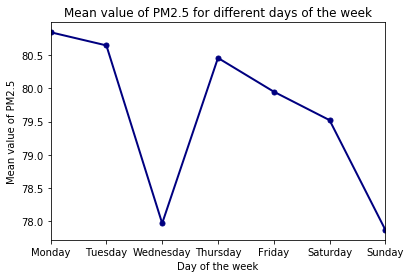

In [40]:
#Mean values of PM2.5 against weekdays
from matplotlib import pyplot as plt
plt.figure()
ax = weekdayMeans["PM2.5"].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of PM2.5 for different days of the week')
ax.set(xlabel='Day of the week', ylabel='Mean value of PM2.5')

plt.show()

<Figure size 432x288 with 0 Axes>

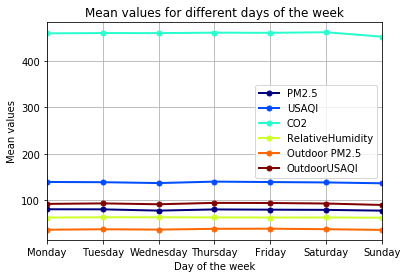

In [43]:
#Mean values against weekdays
from matplotlib import pyplot as plt
plt.figure()
ax = weekdayMeans.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean values for different days of the week')
ax.set(xlabel='Day of the week', ylabel='Mean values')
plt.grid()
plt.show()

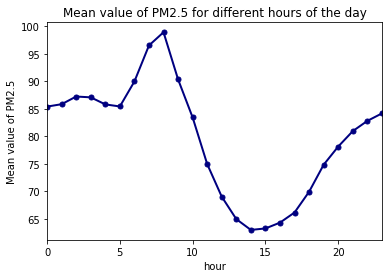

In [41]:
#Mean values of PM2.5 against hours
from matplotlib import pyplot as plt
plt.figure()
ax = hourlyMeans["PM2.5"].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of PM2.5 for different hours of the day')
ax.set(xlabel='hour', ylabel='Mean value of PM2.5')

plt.show()

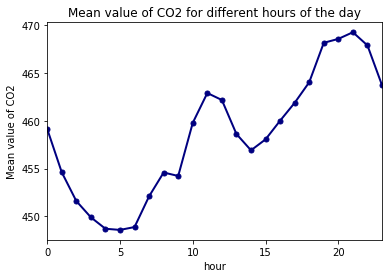

In [53]:
#Mean values of PM2.5 against hours
from matplotlib import pyplot as plt
plt.figure()
ax = hourlyMeans["CO2"].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of CO2 for different hours of the day')
ax.set(xlabel='hour', ylabel='Mean value of CO2')

plt.show()

<Figure size 432x288 with 0 Axes>

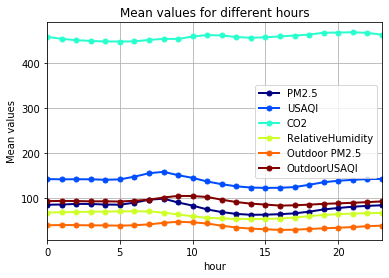

In [44]:
#Mean values against hours
from matplotlib import pyplot as plt
plt.figure()
ax = hourlyMeans.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean values for different hours')
ax.set(xlabel='hour', ylabel='Mean values')
plt.grid()
plt.show()

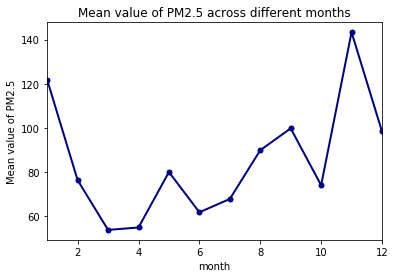

In [46]:
#Mean values of PM2.5 across months
from matplotlib import pyplot as plt
plt.figure()
ax = monthlyMeans["PM2.5"].plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean value of PM2.5 across different months')
ax.set(xlabel='month', ylabel='Mean value of PM2.5')

plt.show()

<Figure size 432x288 with 0 Axes>

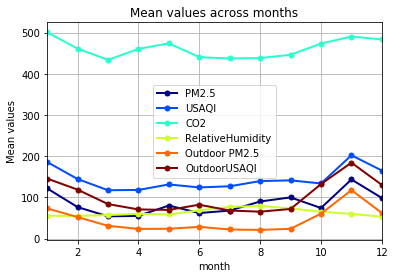

In [47]:
#Mean values across months
from matplotlib import pyplot as plt
plt.figure()
ax = monthlyMeans.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Mean values across months')
ax.set(xlabel='month', ylabel='Mean values')
plt.grid()
plt.show()